<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Data-Science/blob/main/IBMDataScienceCapstoneINDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#DATAFRAME: Pre-Processing

In [ ]:
import pandas as pd

path = '/content/drive/My Drive/IN.xlsx'
data = pd.read_excel(path, header = None)

In [ ]:
print(data.shape)
data.head()

(154809, 12)


0       1             2   ...       9        10 11
0  IN  744101  Marine Jetty  ...  11.6667  92.7500  3
1  IN  744101    Port Blair  ...  11.6667  92.7500  4
2  IN  744101  N.S.Building  ...  11.6667  92.7500  3
3  IN  744102         Haddo  ...  11.6833  92.7167  4
4  IN  744102       Chatham  ...  11.7000  92.6667  3

[5 rows x 12 columns]

In [ ]:
data.dropna(axis = 1, subset = [6, 8], inplace = True)
data.drop(columns =[0, 4, 7, 11], inplace = True)
data.head()

1             2   ...       9        10
0  744101  Marine Jetty  ...  11.6667  92.7500
1  744101    Port Blair  ...  11.6667  92.7500
2  744101  N.S.Building  ...  11.6667  92.7500
3  744102         Haddo  ...  11.6833  92.7167
4  744102       Chatham  ...  11.7000  92.6667

[5 rows x 6 columns]

In [ ]:
data.columns = ['PostalCode', 'Town', 'State', 'City', 'Latitude', 'Longitude']
data.head()

PostalCode          Town  ... Latitude Longitude
0      744101  Marine Jetty  ...  11.6667   92.7500
1      744101    Port Blair  ...  11.6667   92.7500
2      744101  N.S.Building  ...  11.6667   92.7500
3      744102         Haddo  ...  11.6833   92.7167
4      744102       Chatham  ...  11.7000   92.6667

[5 rows x 6 columns]

In [ ]:
data = data[['PostalCode', 'State', 'City', 'Town', 'Latitude', 'Longitude']]
data.head()

PostalCode                      State  ... Latitude Longitude
0      744101  Andaman & Nicobar Islands  ...  11.6667   92.7500
1      744101  Andaman & Nicobar Islands  ...  11.6667   92.7500
2      744101  Andaman & Nicobar Islands  ...  11.6667   92.7500
3      744102  Andaman & Nicobar Islands  ...  11.6833   92.7167
4      744102  Andaman & Nicobar Islands  ...  11.7000   92.6667

[5 rows x 6 columns]

In [ ]:
data.to_csv('India.csv')
!cp India.csv "drive/My Drive/Coursera/IBM"

###DATA Description

In [ ]:
data.describe()

PostalCode       Latitude      Longitude
count  154809.000000  154809.000000  154809.000000
mean   501551.076068      21.895204      79.314494
std    207391.305124       5.795975       4.540033
min    110001.000000       8.083000      68.534100
25%    331403.000000      17.635500      76.304800
50%    504215.000000      23.161200      78.510100
75%    682309.000000      26.314400      81.035200
max    855117.000000      35.339000      96.543100

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154809 entries, 0 to 154808
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PostalCode  154809 non-null  int64  
 1   State       154809 non-null  object 
 2   City        154809 non-null  object 
 3   Town        154809 non-null  object 
 4   Latitude    154809 non-null  float64
 5   Longitude   154809 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ MB


In [ ]:
"""data.State = data.State.astype('|S') #astype('|S80') #where the max length is set at 80 bytes
#data.City.apply(lambda x: str(x))
data.City = data.City.astype('|S')
#data.Town = data.Town.astype('|S') #UnicodeEncodeError: 'ascii' codec can't encode characters in position 9-11: ordinal not in range(128)
data.head()"""

"data.State = data.State.astype('|S') #astype('|S80') #where the max length is set at 80 bytes\n#data.City.apply(lambda x: str(x))\ndata.City = data.City.astype('|S')\n#data.Town = data.Town.astype('|S') #UnicodeEncodeError: 'ascii' codec can't encode characters in position 9-11: ordinal not in range(128)\ndata.head()"

###"NULL" Value Check

In [ ]:
data.isnull().sum()

PostalCode    0
State         0
City          0
Town          0
Latitude      0
Longitude     0
dtype: int64

###Value Count of FEATURES

In [ ]:
print(data['State'].value_counts(), "\n")
print(data['City'].value_counts(), "\n")

Uttar Pradesh                17661
Maharashtra                  12616
Tamil Nadu                   11878
Andhra Pradesh               10335
Rajasthan                    10331
Karnataka                     9737
Bihar                         9059
Gujarat                       8937
West Bengal                   8721
Madhya Pradesh                8309
Odisha                        8162
Telangana                     5832
Kerala                        5057
Assam                         4023
Punjab                        3826
Chattisgarh                   3122
Jharkhand                     3096
Himachal Pradesh              2781
Uttarakhand                   2723
Haryana                       2672
Jammu & Kashmir               1685
Tripura                        710
Manipur                        698
Delhi                          538
Meghalaya                      475
Mizoram                        411
Nagaland                       330
Arunachal Pradesh              295
Goa                 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


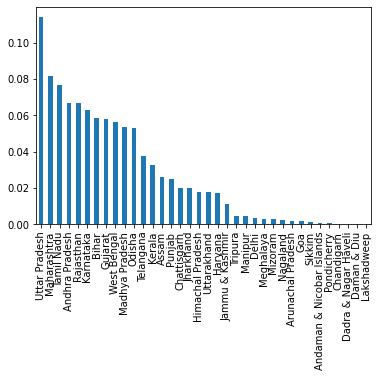

In [ ]:
data.State.value_counts(normalize = True)
data.State.value_counts(normalize = True).plot.bar()
plt.show()

In [ ]:
data.groupby('State').count()

PostalCode   City   Town  Latitude  Longitude
State                                                                   
Andaman & Nicobar Islands         102    102    102       102        102
Andhra Pradesh                  10335  10335  10335     10335      10335
Arunachal Pradesh                 295    295    295       295        295
Assam                            4023   4023   4023      4023       4023
Bihar                            9059   9059   9059      9059       9059
Chandigarh                         51     51     51        51         51
Chattisgarh                      3122   3122   3122      3122       3122
Dadra & Nagar Haveli               39     39     39        39         39
Daman & Diu                        20     20     20        20         20
Delhi                             538    538    538       538        538
Goa                               262    262    262       262        262
Gujarat                          8937   8937   8937      8937       8937
Haryana                          2672   2672   2672      2672       2672
Himachal Pradesh                 2781   2781   2781      2781       2781
Jammu & Kashmir                  1685   1685   1685      1685       1685
Jharkhand                        3096   3096   3096      3096       3096
Karnataka                        9737   9737   9737      9737       9737
Kerala                           5057   5057   5057      5057       5057
Lakshadweep                        10     10     10        10         10
Madhya Pradesh                   8309   8309   8309      8309       8309
Maharashtra                     12616  12616  12616     12616      12616
Manipur                           698    698    698       698        698
Meghalaya                         475    475    475       475        475
Mizoram                           411    411    411       411        411
Nagaland                          330    330    330       330        330
Odisha                           8162   8162   8162      8162       8162
Pondicherry                        94     94     94        94         94
Punjab                           3826   3826   3826      3826       3826
Rajasthan                       10331  10331  10331     10331      10331
Sikkim                            211    211    211       211        211
Tamil Nadu                      11878  11878  11878     11878      11878
Telangana                        5832   5832   5832      5832       5832
Tripura                           710    710    710       710        710
Uttar Pradesh                   17661  17661  17661     17661      17661
Uttarakhand                      2723   2723   2723      2723       2723
West Bengal                      8721   8721   8721      8721       8721

In [ ]:
data.groupby('City').count()

PostalCode  State  Town  Latitude  Longitude
City                                                      
Adilabad             517    517   517       517        517
Agra                 355    355   355       355        355
Ahmed Nagar          667    667   667       667        667
Ahmedabad            513    513   513       513        513
Aizawl               129    129   129       129        129
...                  ...    ...   ...       ...        ...
Wokha                 25     25    25        25         25
Yadgir               200    200   200       200        200
Yamuna Nagar         124    124   124       124        124
Yavatmal             373    373   373       373        373
Zunhebotto            21     21    21        21         21

[631 rows x 5 columns]

In [ ]:
data.groupby('Town').count()

Country  PostalCode  State  City  Latitude  Longitude
Town                                                                          
(Gandhinagar) Sector 16        1           1      1     1         1          1
(Gandhinagar) Sector 17        1           1      1     1         1          1
(Gandhinagar) Sector 19        1           1      1     1         1          1
(Gandhinagar) Sector 21        1           1      1     1         1          1
(Gandhinagar) Sector 22        1           1      1     1         1          1
...                          ...         ...    ...   ...       ...        ...
Zuvvaleru                      1           1      1     1         1          1
Zuvvigunta                     1           1      1     1         1          1
gadoj                          1           1      1     1         1          1
kherkheri Kalan                1           1      1     1         1          1
khilora                        1           1      1     1         1          1

[127471 rows x 6 columns]

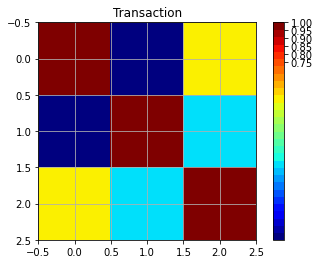

In [ ]:
from matplotlib import cm as cm
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Transaction')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

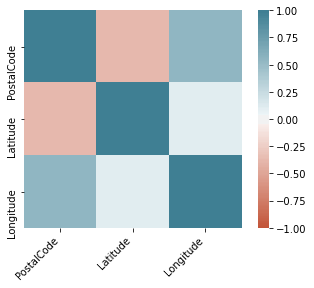

In [ ]:
import seaborn as sns

corr = data.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

In [ ]:
print('There are {} unique States.'.format(len(data['State'].unique())))
print('There are {} unique Cities.'.format(len(data['City'].unique())))
print('There are {} unique Town.'.format(len(data['Town'].unique())))

There are 36 unique States.
There are 631 unique Cities.
There are 127471 unique Town.


#Segmenting and Clustering Neighborhoods in Delhi

> IMPORT LIBRARIES

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
#from pandas.io.json import json_normalize
from pandas import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [ ]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
#from pandas.io.json import json_normalize
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [ ]:
#!pip install pandas==1.0.3
#import pandas as pd

> Quickly examine the resulting dataframe.

In [ ]:
data.head()

PostalCode                      State           City          Town  \
0      744101  Andaman & Nicobar Islands  South Andaman  Marine Jetty   
1      744101  Andaman & Nicobar Islands  South Andaman    Port Blair   
2      744101  Andaman & Nicobar Islands  South Andaman  N.S.Building   
3      744102  Andaman & Nicobar Islands  South Andaman         Haddo   
4      744102  Andaman & Nicobar Islands  South Andaman       Chatham   

   Latitude  Longitude  
0   11.6667    92.7500  
1   11.6667    92.7500  
2   11.6667    92.7500  
3   11.6833    92.7167  
4   11.7000    92.6667

Use geopy library to get the latitude and longitude values of Delhi

> In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [ ]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="four_square")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of India are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of India are 28.6517178, 77.2219388.


> Create a map of Delhi with neighborhoods superimposed on top.

In [ ]:
# create map of Delhi using latitude and longitude values
map_up = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, state in zip(data['Latitude'], data['Longitude'], data['State']):
    label = '{}'.format(state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_up)  
    
map_up

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

> However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Scarborough. So let's slice the original dataframe and create a new dataframe of the Scarborough data.

In [ ]:
delhi = data[data['State'] == 'Delhi'].reset_index(drop=True)
print(delhi.shape)
delhi.head()

(538, 6)


PostalCode  State           City              Town  Latitude  Longitude
0      110001  Delhi  Central Delhi   Connaught Place   28.6328    77.2198
1      110001  Delhi  Central Delhi      North Avenue   28.6371    77.2162
2      110001  Delhi      New Delhi  New Delhi G.P.O.   28.6371    77.2162
3      110001  Delhi  Central Delhi  Parliament House   28.6413    77.2126
4      110001  Delhi  Central Delhi     Patiala House   28.6371    77.2162

In [ ]:
delhi.City.value_counts()

South West Delhi    136
North West Delhi    100
South Delhi          76
East Delhi           66
West Delhi           63
Central Delhi        58
North Delhi          29
North East Delhi      7
New Delhi             3
Name: City, dtype: int64

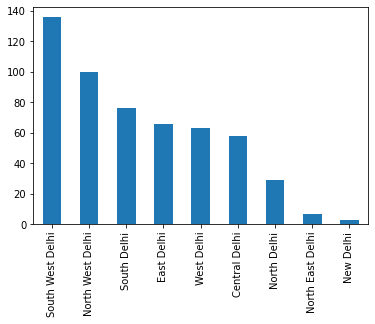

In [ ]:
delhi.City.value_counts().plot.bar()

> Let's get the geographical coordinates of Scarborough.

In [ ]:
address = 'Delhi, India'

geolocator = Nominatim(user_agent="four_square")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


> As we did with all of Delhi, let's visualizat Scarborough the neighborhoods in it.

In [ ]:
# create map of Scarborough using latitude and longitude values
map_up = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(delhi['Latitude'], delhi['Longitude'], delhi['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_up) 
    
map_up

> Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'MHM2TJH4YIURRUE4CQAVYN1AYAX2KLFOAY4BV43OHCFG5RJN' # your Foursquare ID
CLIENT_SECRET = 'MNVUUDPVHCKPZRSMQFVKKQQLE5AMJK3BEYSWFJ2DUE1XW2XN' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MHM2TJH4YIURRUE4CQAVYN1AYAX2KLFOAY4BV43OHCFG5RJN
CLIENT_SECRET:MNVUUDPVHCKPZRSMQFVKKQQLE5AMJK3BEYSWFJ2DUE1XW2XN


Let's explore the first neighborhood in our dataframe.

> Get the neighborhood's name.

In [ ]:
delhi.loc[0, 'City']

'Central Delhi'

> Get the neighborhood's latitude and longitude values.

In [ ]:
city_latitude = delhi.loc[0, 'Latitude'] # neighborhood latitude value
city_longitude = delhi.loc[0, 'Longitude'] # neighborhood longitude value

city_name = delhi.loc[0, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

Latitude and longitude values of Central Delhi are 28.6328, 77.2198.


Now, let's get the top 100 venues that are in Malvern, Rouge within a radius of 500 meters.

> First, let's create the GET request URL. Name your URL **url**.

In [ ]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, city_latitude, city_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=MHM2TJH4YIURRUE4CQAVYN1AYAX2KLFOAY4BV43OHCFG5RJN&client_secret=MNVUUDPVHCKPZRSMQFVKKQQLE5AMJK3BEYSWFJ2DUE1XW2XN&v=20180604&ll=28.6328,77.2198&radius=500&limit=100'

> Send the GET request and examine the results

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f42e425d04dfc25dababaff'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b489b54f964a520595026e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d164941735',
         'name': 'Plaza',
         'pluralName': 'Plazas',
         'primary': True,
         'shortName': 'Plaza'}],
       'id': '4b489b54f964a520595026e3',
       'location': {'address': 'Connaught Place',
        'cc': 'IN',
        'city': 'New Delhi',
        'country': 'India',
        'crossStreet': 'Many streets meet here',
        'distance': 22,
        'formattedAddress': ['Connaught Place (Many streets meet here)',
         'New Delhi 110001',
         'Delhi',
         'India'],
 

> From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

> Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [ ]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name         categories  \
0  Connaught Place | कनॉट प्लेस (Connaught Place)              Plaza   
1               Khan Chacha | खान चाचा | خان چاچا  Indian Restaurant   
2                                        Wenger's             Bakery   
3                                       Starbucks        Coffee Shop   
4                                    Odeon Social               Café   

         lat        lng  
0  28.632731  77.220018  
1  28.634202  77.220780  
2  28.633412  77.218292  
3  28.632011  77.217731  
4  28.634414  77.220936

> And how many venues were returned by Foursquare?

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

69 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Delhi

> Let's create a function to repeat the same process to all the neighborhoods in Delhi

In [ ]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
print(url)    
# make the GET request
results = requests.get(url).json()#["response"]['groups'][0]['items']
results

https://api.foursquare.com/v2/venues/explore?&client_id=MHM2TJH4YIURRUE4CQAVYN1AYAX2KLFOAY4BV43OHCFG5RJN&client_secret=MNVUUDPVHCKPZRSMQFVKKQQLE5AMJK3BEYSWFJ2DUE1XW2XN&v=20180604&ll=29.1765,77.7988&radius=500&limit=100


{'meta': {'code': 200, 'requestId': '5f42e4dbe37c686f5b5da09b'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-5985a0c8eacf456a507abce0-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/salon_barber_',
          'suffix': '.png'},
         'id': '54541900498ea6ccd0202697',
         'name': 'Health & Beauty Service',
         'pluralName': 'Health & Beauty Services',
         'primary': True,
         'shortName': 'Health & Beauty'}],
       'id': '5985a0c8eacf456a507abce0',
       'location': {'address': 'delhi',
        'cc': 'IN',
        'city': 'Delhi',
        'country': 'India',
        'crossStreet': '12',
        'distance': 121,
        'formattedAddress': ['delhi (12)', 'Delhi 110097', 'Delhi', 'India'],
        'labeledLatLngs': [{'label': 'display',
   

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

> Now write the code to run the above function on each neighborhood and create a new dataframe called *UP_venues*.

In [ ]:
try:
  delhi_venues = getNearbyVenues(names = delhi['City'],
                                   latitudes = delhi['Latitude'],
                                   longitudes = delhi['Longitude'])
except:
  print("Error")

delhi_venues

Central Delhi
Central Delhi
New Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
South Delhi
South Delhi
Central Delhi
South Delhi
Central Delhi
South Delhi
Central Delhi
South Delhi
South Delhi
South Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
North Delhi
Central Delhi
North Delhi
North Delhi
North Delhi
North Delhi
Central Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
North Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
Central Delhi
North West Delhi
North West Delhi


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Central Delhi                28.6328                 77.2198   
1        Central Delhi                28.6328                 77.2198   
2        Central Delhi                28.6328                 77.2198   
3        Central Delhi                28.6328                 77.2198   
4        Central Delhi                28.6328                 77.2198   
5        Central Delhi                28.6328                 77.2198   
6        Central Delhi                28.6328                 77.2198   
7        Central Delhi                28.6328                 77.2198   
8        Central Delhi                28.6328                 77.2198   
9        Central Delhi                28.6328                 77.2198   
10       Central Delhi                28.6328                 77.2198   
11       Central Delhi                28.6328                 77.2198   
12       Central Delhi                28.6328                 77.2198   
13       Central Delhi                28.6328                 77.2198   
14       Central Delhi                28.6328                 77.2198   
15       Central Delhi                28.6328                 77.2198   
16       Central Delhi                28.6328                 77.2198   
17       Central Delhi                28.6328                 77.2198   
18       Central Delhi                28.6328                 77.2198   
19       Central Delhi                28.6328                 77.2198   
20       Central Delhi                28.6328                 77.2198   
21       Central Delhi                28.6328                 77.2198   
22       Central Delhi                28.6328                 77.2198   
23       Central Delhi                28.6328                 77.2198   
24       Central Delhi                28.6328                 77.2198   
25       Central Delhi                28.6328                 77.2198   
26       Central Delhi                28.6328                 77.2198   
27       Central Delhi                28.6328                 77.2198   
28       Central Delhi                28.6328                 77.2198   
29       Central Delhi                28.6328                 77.2198   
30       Central Delhi                28.6328                 77.2198   
31       Central Delhi                28.6328                 77.2198   
32       Central Delhi                28.6328                 77.2198   
33       Central Delhi                28.6328                 77.2198   
34       Central Delhi                28.6328                 77.2198   
35       Central Delhi                28.6328                 77.2198   
36       Central Delhi                28.6328                 77.2198   
37       Central Delhi                28.6328                 77.2198   
38       Central Delhi                28.6328                 77.2198   
39       Central Delhi                28.6328                 77.2198   
40       Central Delhi                28.6328                 77.2198   
41       Central Delhi                28.6328                 77.2198   
42       Central Delhi                28.6328                 77.2198   
43       Central Delhi                28.6328                 77.2198   
44       Central Delhi                28.6328                 77.2198   
45       Central Delhi                28.6328                 77.2198   
46       Central Delhi                28.6328                 77.2198   
47       Central Delhi                28.6328                 77.2198   
48       Central Delhi                28.6328                 77.2198   
49       Central Delhi                28.6328                 77.2198   
50       Central Delhi                28.6328                 77.2198   
51       Central Delhi                28.6328                 77.2198   
52       Central Delhi                28.6328                 77.2198   
53       Central Delhi                28.6328                 77.219

> Let's check the size of the resulting dataframe

In [ ]:
print(delhi_venues.shape)
delhi_venues.head()

(2762, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Central Delhi                28.6328                 77.2198   
1  Central Delhi                28.6328                 77.2198   
2  Central Delhi                28.6328                 77.2198   
3  Central Delhi                28.6328                 77.2198   
4  Central Delhi                28.6328                 77.2198   

                                            Venue  Venue Latitude  \
0  Connaught Place | कनॉट प्लेस (Connaught Place)       28.632731   
1               Khan Chacha | खान चाचा | خان چاچا       28.634202   
2                                        Wenger's       28.633412   
3                                       Starbucks       28.632011   
4                                    Odeon Social       28.634414   

   Venue Longitude     Venue Category  
0        77.220018              Plaza  
1        77.220780  Indian Restaurant  
2        77.218292             Bakery  
3        77.217731        Coffee Shop  
4        77.220936               Café

In [ ]:
print(delhi_venues.Neighborhood.value_counts())

Central Delhi       1093
South West Delhi     634
North Delhi          314
South Delhi          295
North West Delhi     144
East Delhi           136
West Delhi            99
New Delhi             32
North East Delhi      15
Name: Neighborhood, dtype: int64


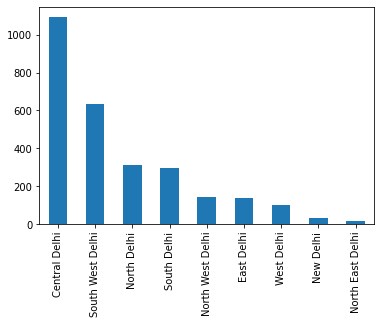

In [ ]:
delhi_venues.Neighborhood.value_counts().plot.bar()

> Let's check how many venues were returned for each neighborhood

In [ ]:
delhi_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                             
Central Delhi                      1093                    1093   1093   
East Delhi                          136                     136    136   
New Delhi                            32                      32     32   
North Delhi                         314                     314    314   
North East Delhi                     15                      15     15   
North West Delhi                    144                     144    144   
South Delhi                         295                     295    295   
South West Delhi                    634                     634    634   
West Delhi                           99                      99     99   

                  Venue Latitude  Venue Longitude  Venue Category  
Neighborhood                                                       
Central Delhi               1093             1093            1093  
East Delhi                   136              136             136  
New Delhi                     32               32              32  
North Delhi                  314              314             314  
North East Delhi              15               15              15  
North West Delhi             144              144             144  
South Delhi                  295              295             295  
South West Delhi             634              634             634  
West Delhi                    99               99              99

> Let's find out how many unique categories can be curated from all the returned venues

In [ ]:
print('There are {} uniques categories.'.format(len(delhi_venues['Venue Category'].unique())))
print('There are {} uniques venues.'.format(len(delhi_venues['Venue'].unique())))

There are 114 uniques categories.
There are 325 uniques venues.


## 3. Analyze Each Neighborhood

In [ ]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhood'] = delhi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
delhi_onehot = delhi_onehot[fixed_columns]

delhi_onehot.head()

Neighborhood  ATM  Accessories Store  Afghan Restaurant  \
0  Central Delhi    0                  0                  0   
1  Central Delhi    0                  0                  0   
2  Central Delhi    0                  0                  0   
3  Central Delhi    0                  0                  0   
4  Central Delhi    0                  0                  0   

   American Restaurant  Arcade  Art Gallery  Asian Restaurant  Astrologer  \
0                    0       0            0                 0           0   
1                    0       0            0                 0           0   
2                    0       0            0                 0           0   
3                    0       0            0                 0           0   
4                    0       0            0                 0           0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Bed & Breakfast  Beer Garden  \
0          0           0       0     0    0                0            0   
1          0           0       0     0    0                0            0   
2          0           0       1     0    0                0            0   
3          0           0       0     0    0                0            0   
4          0           0       0     0    0                0            0   

   Bengali Restaurant  Bistro  Bookstore  Boutique  Breakfast Spot  \
0                   0       0          0         0               0   
1                   0       0          0         0               0   
2                   0       0          0         0               0   
3                   0       0          0         0               0   
4                   0       0          0         0               0   

   Burger Joint  Bus Station  Business Service  Cafeteria  Café  \
0             0            0                 0          0     0   
1             0            0                 0          0     0   
2             0            0                 0          0     0   
3             0            0                 0          0     0   
4             0            0                 0          0     1   

   Chinese Restaurant  Clothing Store  Coffee Shop  Deli / Bodega  \
0                   0               0            0              0   
1                   0               0            0              0   
2                   0               0            0              0   
3                   0               0            1              0   
4                   0               0            0              0   

   Department Store  Dessert Shop  Diner  Discount Store  Donut Shop  \
0                 0             0      0               0           0   
1                 0             0      0               0           0   
2                 0             0      0               0           0   
3                 0             0      0               0           0   
4                 0             0      0               0           0   

   Dumpling Restaurant  Electronics Store  Falafel Restaurant  Farm  \
0                    0                  0                   0     0   
1                    0                  0                   0     0   
2                    0                  0                   0     0   
3                    0                  0                   0     0   
4                    0                  0                   0     0   

   Fast Food Restaurant  Film Studio  Flea Market  Food  Food & Drink Shop  \
0                     0            0            0     0                  0   
1                     0            0            0     0                  0   
2                     0            0            0     0                  0   
3                     0            0            0     0                  0   
4                     0            0            0     0                  0   

   Food Court  Food Service  Food Truck  Fried Chicken Joint  \
0           0             0           0                    0   
1  

> And let's examine the new dataframe size.

In [ ]:
delhi_onehot.shape

(2762, 115)

> Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [ ]:
delhi_grouped = delhi_onehot.groupby('Neighborhood').mean().reset_index()
delhi_grouped

Neighborhood       ATM  Accessories Store  Afghan Restaurant  \
0     Central Delhi  0.000000           0.000000           0.000000   
1        East Delhi  0.044118           0.058824           0.036765   
2         New Delhi  0.000000           0.000000           0.000000   
3       North Delhi  0.000000           0.000000           0.000000   
4  North East Delhi  0.066667           0.000000           0.066667   
5  North West Delhi  0.000000           0.000000           0.000000   
6       South Delhi  0.000000           0.000000           0.000000   
7  South West Delhi  0.004732           0.001577           0.000000   
8        West Delhi  0.000000           0.000000           0.000000   

   American Restaurant   Arcade  Art Gallery  Asian Restaurant  Astrologer  \
0             0.000000  0.00000     0.010064          0.017383    0.005489   
1             0.000000  0.00000     0.000000          0.000000    0.000000   
2             0.000000  0.00000     0.000000          0.031250    0.000000   
3             0.000000  0.00000     0.060510          0.000000    0.000000   
4             0.000000  0.00000     0.000000          0.000000    0.000000   
5             0.000000  0.00000     0.048611          0.000000    0.000000   
6             0.003390  0.00339     0.023729          0.000000    0.077966   
7             0.018927  0.00000     0.018927          0.023659    0.053628   
8             0.000000  0.00000     0.000000          0.000000    0.101010   

   BBQ Joint  Bagel Shop    Bakery      Bank       Bar  Bed & Breakfast  \
0   0.018298    0.000000  0.029277  0.001830  0.025618         0.000000   
1   0.000000    0.000000  0.000000  0.000000  0.000000         0.000000   
2   0.031250    0.000000  0.031250  0.000000  0.031250         0.000000   
3   0.000000    0.000000  0.000000  0.000000  0.000000         0.000000   
4   0.000000    0.000000  0.000000  0.000000  0.000000         0.000000   
5   0.000000    0.000000  0.000000  0.000000  0.000000         0.000000   
6   0.000000    0.000000  0.020339  0.064407  0.003390         0.000000   
7   0.000000    0.009464  0.023659  0.018927  0.033123         0.001577   
8   0.000000    0.000000  0.000000  0.090909  0.000000         0.000000   

   Beer Garden  Bengali Restaurant    Bistro  Bookstore  Boutique  \
0     0.000915             0.00000  0.000915   0.000000  0.000000   
1     0.000000             0.00000  0.000000   0.000000  0.007353   
2     0.000000             0.00000  0.000000   0.000000  0.000000   
3     0.000000             0.00000  0.000000   0.000000  0.000000   
4     0.000000             0.00000  0.000000   0.000000  0.000000   
5     0.000000             0.00000  0.000000   0.000000  0.000000   
6     0.000000             0.00339  0.000000   0.000000  0.000000   
7     0.004732             0.00000  0.000000   0.004732  0.000000   
8     0.000000             0.00000  0.000000   0.000000  0.000000   

   Breakfast Spot  Burger Joint  Bus Station  Business Service  Cafeteria  \
0        0.004575      0.000000     0.001830          0.000000   0.020128   
1        0.000000      0.000000     0.000000          0.000000   0.000000   
2        0.000000      0.000000     0.000000          0.000000   0.000000   
3        0.000000      0.000000     0.000000          0.000000   0.121019   
4        0.000000      0.000000     0.000000          0.000000   0.000000   
5        0.000000      0.000000     0.000000          0.000000   0.097222   
6        0.000000      0.000000     0.054237          0.006780   0.047458   
7        0.000000      0.004732     0.018927          0.022082   0.000000   
8        0.010101      0.000000     0.090909          0.030303   0.000000   

       Café  Chinese Restaurant  Clothing Store  Coffee Shop  Deli / Bodega  \
0  0.078683            0.085087        0.019213     0.002745       0.018298   
1  0.000000            0.000000        0.000000     0.000000       0.000000   
2  0.125000            0.125000        0.031250     0.000000     

> Let's confirm the new size

In [ ]:
delhi_grouped.shape

(9, 115)

> Let's print each neighborhood along with the top 5 most common venues

In [ ]:
num_top_venues = 10

for hood in delhi_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = delhi_grouped[delhi_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Delhi----
                  venue  freq
0     Indian Restaurant  0.16
1                 Hotel  0.13
2    Chinese Restaurant  0.09
3                  Café  0.08
4  Fast Food Restaurant  0.04
5                   Bar  0.03
6                Bakery  0.03
7          Dessert Shop  0.03
8            Restaurant  0.02
9             BBQ Joint  0.02


----East Delhi----
                     venue  freq
0  Health & Beauty Service  0.21
1            Shopping Mall  0.16
2               Public Art  0.15
3        Electronics Store  0.09
4              Film Studio  0.06
5        Accessories Store  0.06
6           Lingerie Store  0.06
7             Home Service  0.06
8                      ATM  0.04
9        Afghan Restaurant  0.04


----New Delhi----
                            venue  freq
0               Indian Restaurant  0.19
1                           Hotel  0.16
2                            Café  0.12
3              Chinese Restaurant  0.12
4                             Bar  0.03
5   

Let's put that into a *pandas* dataframe

> First, let's write a function to sort the venues in descending order.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood    1st Most Common Venue 2nd Most Common Venue  \
0     Central Delhi        Indian Restaurant                 Hotel   
1        East Delhi  Health & Beauty Service         Shopping Mall   
2         New Delhi        Indian Restaurant                 Hotel   
3       North Delhi        Indian Restaurant             Cafeteria   
4  North East Delhi  Health & Beauty Service            Public Art   

  3rd Most Common Venue          4th Most Common Venue 5th Most Common Venue  \
0    Chinese Restaurant                           Café  Fast Food Restaurant   
1            Public Art              Electronics Store          Home Service   
2    Chinese Restaurant                           Café             Nightclub   
3            Restaurant  Vegetarian / Vegan Restaurant     Food & Drink Shop   
4         Shopping Mall                            ATM     Afghan Restaurant   

  6th Most Common Venue 7th Most Common Venue           8th Most Common Venue  \
0          Dessert Shop                Bakery                             Bar   
1     Accessories Store           Film Studio                  Lingerie Store   
2                   Bar          Dessert Shop  Multicuisine Indian Restaurant   
3   Monument / Landmark        Ice Cream Shop                            Park   
4     Electronics Store           Flea Market                    Dessert Shop   

  9th Most Common Venue 10th Most Common Venue  
0                 Diner     Tibetan Restaurant  
1                   ATM      Afghan Restaurant  
2         Deli / Bodega         Clothing Store  
3           Art Gallery     Chinese Restaurant  
4                 Diner         Discount Store

## 4. Cluster Neighborhoods

> Run *k*-means to cluster the neighborhood into 5 clusters.

In [ ]:
# set number of clusters
kclusters = 5

delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 4, 0, 1, 0, 2, 2, 3], dtype=int32)

> Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [ ]:
X = delhi
X.columns = ['PostalCode', 'State', 'Neighborhood', 'Town', 'Latitude', 'Longitude']

In [ ]:
X = X.drop(['Town'], axis = 1)
X.head()

PostalCode  State   Neighborhood  Latitude  Longitude
0      110001  Delhi  Central Delhi   28.6328    77.2198
1      110001  Delhi  Central Delhi   28.6371    77.2162
2      110001  Delhi      New Delhi   28.6371    77.2162
3      110001  Delhi  Central Delhi   28.6413    77.2126
4      110001  Delhi  Central Delhi   28.6371    77.2162

In [ ]:
neighborhoods_venues_sorted.set_index('Neighborhood')

Cluster Labels    1st Most Common Venue  \
Neighborhood                                                
Central Delhi                  4        Indian Restaurant   
East Delhi                     1  Health & Beauty Service   
New Delhi                      4        Indian Restaurant   
North Delhi                    0        Indian Restaurant   
North East Delhi               1  Health & Beauty Service   
North West Delhi               0        Indian Restaurant   
South Delhi                    2        Indian Restaurant   
South West Delhi               2        Indian Restaurant   
West Delhi                     3              IT Services   

                 2nd Most Common Venue    3rd Most Common Venue  \
Neighborhood                                                      
Central Delhi                    Hotel       Chinese Restaurant   
East Delhi               Shopping Mall               Public Art   
New Delhi                        Hotel       Chinese Restaurant   
North Delhi                  Cafeteria               Restaurant   
North East Delhi            Public Art            Shopping Mall   
North West Delhi             Cafeteria  Health & Beauty Service   
South Delhi                 Astrologer              IT Services   
South West Delhi                  Café               Astrologer   
West Delhi                        Café  Health & Beauty Service   

                          4th Most Common Venue  \
Neighborhood                                      
Central Delhi                              Café   
East Delhi                    Electronics Store   
New Delhi                                  Café   
North Delhi       Vegetarian / Vegan Restaurant   
North East Delhi                            ATM   
North West Delhi                     Restaurant   
South Delhi                                Bank   
South West Delhi                     Restaurant   
West Delhi                    Mobile Phone Shop   

                          5th Most Common Venue 6th Most Common Venue  \
Neighborhood                                                            
Central Delhi              Fast Food Restaurant          Dessert Shop   
East Delhi                         Home Service     Accessories Store   
New Delhi                             Nightclub                   Bar   
North Delhi                   Food & Drink Shop   Monument / Landmark   
North East Delhi              Afghan Restaurant     Electronics Store   
North West Delhi  Vegetarian / Vegan Restaurant           Art Gallery   
South Delhi                Fast Food Restaurant           Bus Station   
South West Delhi             Italian Restaurant  Fast Food Restaurant   
West Delhi                           Astrologer            Restaurant   

                 7th Most Common Venue           8th Most Common Venue  \
Neighborhood                                                             
Central Delhi                   Bakery                             Bar   
East Delhi                 Film Studio                  Lingerie Store   
New Delhi                 Dessert Shop  Multicuisine Indian Restaurant   
North Delhi             Ice Cream Shop                            Park   
North East Delhi           Flea Market                    Dessert Shop   
North West Delhi    Chinese Restaurant               Food & Drink Shop   
South Delhi                  Cafeteria                  Discount Store   
South West Delhi           Coffee Shop         Health & Beauty Service   
West Delhi               Jewelry Store                            Bank   

                 9th Most Common Venue 10th Most Common Venue  
Neighborhood                                                   
Central Delhi                    Diner     Tibetan Restaurant  
East Delhi                         ATM      Afghan Restaurant  
New Delhi                Deli / Bodega         Clothing Store  
North Delhi                Art Gallery     Chinese Restaurant  
North East Delhi                 Diner     

In [ ]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = X

# merge delhi_grouped with delhi_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

delhi_merged.head() # check the last columns!

PostalCode  State   Neighborhood  Latitude  Longitude  Cluster Labels  \
0      110001  Delhi  Central Delhi   28.6328    77.2198               4   
1      110001  Delhi  Central Delhi   28.6371    77.2162               4   
2      110001  Delhi      New Delhi   28.6371    77.2162               4   
3      110001  Delhi  Central Delhi   28.6413    77.2126               4   
4      110001  Delhi  Central Delhi   28.6371    77.2162               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                 Hotel    Chinese Restaurant   
1     Indian Restaurant                 Hotel    Chinese Restaurant   
2     Indian Restaurant                 Hotel    Chinese Restaurant   
3     Indian Restaurant                 Hotel    Chinese Restaurant   
4     Indian Restaurant                 Hotel    Chinese Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                  Café  Fast Food Restaurant          Dessert Shop   
1                  Café  Fast Food Restaurant          Dessert Shop   
2                  Café             Nightclub                   Bar   
3                  Café  Fast Food Restaurant          Dessert Shop   
4                  Café  Fast Food Restaurant          Dessert Shop   

  7th Most Common Venue           8th Most Common Venue 9th Most Common Venue  \
0                Bakery                             Bar                 Diner   
1                Bakery                             Bar                 Diner   
2          Dessert Shop  Multicuisine Indian Restaurant         Deli / Bodega   
3                Bakery                             Bar                 Diner   
4                Bakery                             Bar                 Diner   

  10th Most Common Venue  
0     Tibetan Restaurant  
1     Tibetan Restaurant  
2         Clothing Store  
3     Tibetan Restaurant  
4     Tibetan Restaurant

In [ ]:
delhi_merged = delhi_merged.drop(16)
#delhi_merged

In [ ]:
delhi_merged['Cluster Labels'] = delhi_merged['Cluster Labels'].astype(int)
delhi_merged.head()

PostalCode  State   Neighborhood  Latitude  Longitude  Cluster Labels  \
0      110001  Delhi  Central Delhi   28.6328    77.2198               4   
1      110001  Delhi  Central Delhi   28.6371    77.2162               4   
2      110001  Delhi      New Delhi   28.6371    77.2162               4   
3      110001  Delhi  Central Delhi   28.6413    77.2126               4   
4      110001  Delhi  Central Delhi   28.6371    77.2162               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                 Hotel    Chinese Restaurant   
1     Indian Restaurant                 Hotel    Chinese Restaurant   
2     Indian Restaurant                 Hotel    Chinese Restaurant   
3     Indian Restaurant                 Hotel    Chinese Restaurant   
4     Indian Restaurant                 Hotel    Chinese Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                  Café  Fast Food Restaurant          Dessert Shop   
1                  Café  Fast Food Restaurant          Dessert Shop   
2                  Café             Nightclub                   Bar   
3                  Café  Fast Food Restaurant          Dessert Shop   
4                  Café  Fast Food Restaurant          Dessert Shop   

  7th Most Common Venue           8th Most Common Venue 9th Most Common Venue  \
0                Bakery                             Bar                 Diner   
1                Bakery                             Bar                 Diner   
2          Dessert Shop  Multicuisine Indian Restaurant         Deli / Bodega   
3                Bakery                             Bar                 Diner   
4                Bakery                             Bar                 Diner   

  10th Most Common Venue  
0     Tibetan Restaurant  
1     Tibetan Restaurant  
2         Clothing Store  
3     Tibetan Restaurant  
4     Tibetan Restaurant

> Finally, let's visualize the resulting clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

> Cluster 1

In [ ]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 0, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

State  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
47   Delhi               0     Indian Restaurant             Cafeteria   
49   Delhi               0     Indian Restaurant             Cafeteria   
50   Delhi               0     Indian Restaurant             Cafeteria   
51   Delhi               0     Indian Restaurant             Cafeteria   
52   Delhi               0     Indian Restaurant             Cafeteria   
54   Delhi               0     Indian Restaurant             Cafeteria   
55   Delhi               0     Indian Restaurant             Cafeteria   
56   Delhi               0     Indian Restaurant             Cafeteria   
57   Delhi               0     Indian Restaurant             Cafeteria   
58   Delhi               0     Indian Restaurant             Cafeteria   
59   Delhi               0     Indian Restaurant             Cafeteria   
60   Delhi               0     Indian Restaurant             Cafeteria   
61   Delhi               0     Indian Restaurant             Cafeteria   
62   Delhi               0     Indian Restaurant             Cafeteria   
63   Delhi               0     Indian Restaurant             Cafeteria   
64   Delhi               0     Indian Restaurant             Cafeteria   
65   Delhi               0     Indian Restaurant             Cafeteria   
66   Delhi               0     Indian Restaurant             Cafeteria   
67   Delhi               0     Indian Restaurant             Cafeteria   
73   Delhi               0     Indian Restaurant             Cafeteria   
74   Delhi               0     Indian Restaurant             Cafeteria   
75   Delhi               0     Indian Restaurant             Cafeteria   
76   Delhi               0     Indian Restaurant             Cafeteria   
77   Delhi               0     Indian Restaurant             Cafeteria   
78   Delhi               0     Indian Restaurant             Cafeteria   
79   Delhi               0     Indian Restaurant             Cafeteria   
225  Delhi               0     Indian Restaurant             Cafeteria   
226  Delhi               0     Indian Restaurant             Cafeteria   
227  Delhi               0     Indian Restaurant             Cafeteria   
228  Delhi               0     Indian Restaurant             Cafeteria   
229  Delhi               0     Indian Restaurant             Cafeteria   
230  Delhi               0     Indian Restaurant             Cafeteria   
231  Delhi               0     Indian Restaurant             Cafeteria   
232  Delhi               0     Indian Restaurant             Cafeteria   
233  Delhi               0     Indian Restaurant             Cafeteria   
234  Delhi               0     Indian Restaurant             Cafeteria   
235  Delhi               0     Indian Restaurant             Cafeteria   
236  Delhi               0     Indian Restaurant             Cafeteria   
237  Delhi               0     Indian Restaurant             Cafeteria   
238  Delhi               0     Indian Restaurant             Cafeteria   
239  Delhi               0     Indian Restaurant             Cafeteria   
240  Delhi               0     Indian Restaurant             Cafeteria   
241  Delhi               0     Indian Restaurant             Cafeteria   
242  Delhi               0     Indian Restaurant             Cafeteria   
243  Delhi               0     Indian Restaurant             Cafeteria   
244  Delhi               0     Indian Restaurant             Cafeteria   
245  Delhi               0     Indian Restaurant             Cafeteria   
246  Delhi               0     Indian Restaurant             Cafeteria   
247  Delhi               0     Indian Restaurant             Cafeteria   
248  Delhi               0     Indian Restaurant             Cafeteria   
249  Delhi               0     Indian Restaurant             Cafeteria   
250  Delhi               0     Indian Restaurant             Cafeteria   
251  Delhi               0     Indian Restaurant             Cafeteria   
252  Delh

> Cluster 2

In [ ]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 1, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

State  Cluster Labels    1st Most Common Venue 2nd Most Common Venue  \
205  Delhi               1  Health & Beauty Service         Shopping Mall   
206  Delhi               1  Health & Beauty Service         Shopping Mall   
207  Delhi               1  Health & Beauty Service         Shopping Mall   
208  Delhi               1  Health & Beauty Service         Shopping Mall   
209  Delhi               1  Health & Beauty Service         Shopping Mall   
210  Delhi               1  Health & Beauty Service         Shopping Mall   
211  Delhi               1  Health & Beauty Service         Shopping Mall   
212  Delhi               1  Health & Beauty Service         Shopping Mall   
213  Delhi               1  Health & Beauty Service            Public Art   
214  Delhi               1  Health & Beauty Service         Shopping Mall   
215  Delhi               1  Health & Beauty Service         Shopping Mall   
216  Delhi               1  Health & Beauty Service         Shopping Mall   
217  Delhi               1  Health & Beauty Service         Shopping Mall   
218  Delhi               1  Health & Beauty Service         Shopping Mall   
219  Delhi               1  Health & Beauty Service         Shopping Mall   
220  Delhi               1  Health & Beauty Service         Shopping Mall   
221  Delhi               1  Health & Beauty Service         Shopping Mall   
222  Delhi               1  Health & Beauty Service         Shopping Mall   
223  Delhi               1  Health & Beauty Service         Shopping Mall   
224  Delhi               1  Health & Beauty Service         Shopping Mall   
332  Delhi               1  Health & Beauty Service         Shopping Mall   
333  Delhi               1  Health & Beauty Service         Shopping Mall   
334  Delhi               1  Health & Beauty Service         Shopping Mall   
335  Delhi               1  Health & Beauty Service         Shopping Mall   
341  Delhi               1  Health & Beauty Service         Shopping Mall   
342  Delhi               1  Health & Beauty Service         Shopping Mall   
343  Delhi               1  Health & Beauty Service         Shopping Mall   
344  Delhi               1  Health & Beauty Service            Public Art   
345  Delhi               1  Health & Beauty Service         Shopping Mall   
346  Delhi               1  Health & Beauty Service         Shopping Mall   
347  Delhi               1  Health & Beauty Service         Shopping Mall   
348  Delhi               1  Health & Beauty Service         Shopping Mall   
349  Delhi               1  Health & Beauty Service         Shopping Mall   
496  Delhi               1  Health & Beauty Service            Public Art   
497  Delhi               1  Health & Beauty Service            Public Art   
498  Delhi               1  Health & Beauty Service         Shopping Mall   
499  Delhi               1  Health & Beauty Service         Shopping Mall   
500  Delhi               1  Health & Beauty Service         Shopping Mall   
501  Delhi               1  Health & Beauty Service         Shopping Mall   
502  Delhi               1  Health & Beauty Service         Shopping Mall   
503  Delhi               1  Health & Beauty Service         Shopping Mall   
504  Delhi               1  Health & Beauty Service         Shopping Mall   
505  Delhi               1  Health & Beauty Service         Shopping Mall   
506  Delhi               1  Health & Beauty Service         Shopping Mall   
507  Delhi               1  Health & Beauty Service         Shopping Mall   
508  Delhi               1  Health & Beauty Service         Shopping Mall   
509  Delhi               1  Health & Beauty Service         Shopping Mall   
510  Delhi               1  Health & Beauty Service         Shopping Mall   
511  Delhi               1  Health & Beauty Service         Shopping Mall   
512  Delhi               1  Health & Beauty Service         Shopping Mall   
513  Delhi               1  Health & Beauty Service         Shopping Mall   
5

> Cluster 3

In [ ]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 2, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

State  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
28   Delhi               2     Indian Restaurant            Astrologer   
29   Delhi               2     Indian Restaurant            Astrologer   
31   Delhi               2     Indian Restaurant            Astrologer   
33   Delhi               2     Indian Restaurant            Astrologer   
35   Delhi               2     Indian Restaurant            Astrologer   
36   Delhi               2     Indian Restaurant            Astrologer   
37   Delhi               2     Indian Restaurant            Astrologer   
80   Delhi               2     Indian Restaurant                  Café   
81   Delhi               2     Indian Restaurant                  Café   
82   Delhi               2     Indian Restaurant                  Café   
83   Delhi               2     Indian Restaurant                  Café   
84   Delhi               2     Indian Restaurant                  Café   
85   Delhi               2     Indian Restaurant                  Café   
86   Delhi               2     Indian Restaurant                  Café   
87   Delhi               2     Indian Restaurant                  Café   
88   Delhi               2     Indian Restaurant                  Café   
89   Delhi               2     Indian Restaurant                  Café   
90   Delhi               2     Indian Restaurant                  Café   
91   Delhi               2     Indian Restaurant                  Café   
92   Delhi               2     Indian Restaurant                  Café   
93   Delhi               2     Indian Restaurant                  Café   
100  Delhi               2     Indian Restaurant            Astrologer   
101  Delhi               2     Indian Restaurant            Astrologer   
102  Delhi               2     Indian Restaurant            Astrologer   
103  Delhi               2     Indian Restaurant            Astrologer   
104  Delhi               2     Indian Restaurant            Astrologer   
105  Delhi               2     Indian Restaurant            Astrologer   
114  Delhi               2     Indian Restaurant                  Café   
115  Delhi               2     Indian Restaurant                  Café   
116  Delhi               2     Indian Restaurant                  Café   
117  Delhi               2     Indian Restaurant                  Café   
118  Delhi               2     Indian Restaurant                  Café   
119  Delhi               2     Indian Restaurant                  Café   
120  Delhi               2     Indian Restaurant            Astrologer   
121  Delhi               2     Indian Restaurant            Astrologer   
122  Delhi               2     Indian Restaurant            Astrologer   
123  Delhi               2     Indian Restaurant            Astrologer   
124  Delhi               2     Indian Restaurant            Astrologer   
125  Delhi               2     Indian Restaurant            Astrologer   
126  Delhi               2     Indian Restaurant            Astrologer   
127  Delhi               2     Indian Restaurant            Astrologer   
140  Delhi               2     Indian Restaurant            Astrologer   
141  Delhi               2     Indian Restaurant            Astrologer   
142  Delhi               2     Indian Restaurant            Astrologer   
143  Delhi               2     Indian Restaurant            Astrologer   
144  Delhi               2     Indian Restaurant            Astrologer   
145  Delhi               2     Indian Restaurant            Astrologer   
146  Delhi               2     Indian Restaurant            Astrologer   
147  Delhi               2     Indian Restaurant            Astrologer   
148  Delhi               2     Indian Restaurant            Astrologer   
150  Delhi               2     Indian Restaurant            Astrologer   
151  Delhi               2     Indian Restaurant            Astrologer   
152  Delhi               2     Indian Restaurant                  Café   
153  Delh

> Cluster 4

In [ ]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 2, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

State  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
28   Delhi               2     Indian Restaurant            Astrologer   
29   Delhi               2     Indian Restaurant            Astrologer   
31   Delhi               2     Indian Restaurant            Astrologer   
33   Delhi               2     Indian Restaurant            Astrologer   
35   Delhi               2     Indian Restaurant            Astrologer   
36   Delhi               2     Indian Restaurant            Astrologer   
37   Delhi               2     Indian Restaurant            Astrologer   
80   Delhi               2     Indian Restaurant                  Café   
81   Delhi               2     Indian Restaurant                  Café   
82   Delhi               2     Indian Restaurant                  Café   
83   Delhi               2     Indian Restaurant                  Café   
84   Delhi               2     Indian Restaurant                  Café   
85   Delhi               2     Indian Restaurant                  Café   
86   Delhi               2     Indian Restaurant                  Café   
87   Delhi               2     Indian Restaurant                  Café   
88   Delhi               2     Indian Restaurant                  Café   
89   Delhi               2     Indian Restaurant                  Café   
90   Delhi               2     Indian Restaurant                  Café   
91   Delhi               2     Indian Restaurant                  Café   
92   Delhi               2     Indian Restaurant                  Café   
93   Delhi               2     Indian Restaurant                  Café   
100  Delhi               2     Indian Restaurant            Astrologer   
101  Delhi               2     Indian Restaurant            Astrologer   
102  Delhi               2     Indian Restaurant            Astrologer   
103  Delhi               2     Indian Restaurant            Astrologer   
104  Delhi               2     Indian Restaurant            Astrologer   
105  Delhi               2     Indian Restaurant            Astrologer   
114  Delhi               2     Indian Restaurant                  Café   
115  Delhi               2     Indian Restaurant                  Café   
116  Delhi               2     Indian Restaurant                  Café   
117  Delhi               2     Indian Restaurant                  Café   
118  Delhi               2     Indian Restaurant                  Café   
119  Delhi               2     Indian Restaurant                  Café   
120  Delhi               2     Indian Restaurant            Astrologer   
121  Delhi               2     Indian Restaurant            Astrologer   
122  Delhi               2     Indian Restaurant            Astrologer   
123  Delhi               2     Indian Restaurant            Astrologer   
124  Delhi               2     Indian Restaurant            Astrologer   
125  Delhi               2     Indian Restaurant            Astrologer   
126  Delhi               2     Indian Restaurant            Astrologer   
127  Delhi               2     Indian Restaurant            Astrologer   
140  Delhi               2     Indian Restaurant            Astrologer   
141  Delhi               2     Indian Restaurant            Astrologer   
142  Delhi               2     Indian Restaurant            Astrologer   
143  Delhi               2     Indian Restaurant            Astrologer   
144  Delhi               2     Indian Restaurant            Astrologer   
145  Delhi               2     Indian Restaurant            Astrologer   
146  Delhi               2     Indian Restaurant            Astrologer   
147  Delhi               2     Indian Restaurant            Astrologer   
148  Delhi               2     Indian Restaurant            Astrologer   
150  Delhi               2     Indian Restaurant            Astrologer   
151  Delhi               2     Indian Restaurant            Astrologer   
152  Delhi               2     Indian Restaurant                  Café   
153  Delh

> Cluster 5

In [ ]:
delhi_merged.loc[delhi_merged['Cluster Labels'] == 2, delhi_merged.columns[[1] + list(range(5, delhi_merged.shape[1]))]]

State  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
28   Delhi               2     Indian Restaurant            Astrologer   
29   Delhi               2     Indian Restaurant            Astrologer   
31   Delhi               2     Indian Restaurant            Astrologer   
33   Delhi               2     Indian Restaurant            Astrologer   
35   Delhi               2     Indian Restaurant            Astrologer   
36   Delhi               2     Indian Restaurant            Astrologer   
37   Delhi               2     Indian Restaurant            Astrologer   
80   Delhi               2     Indian Restaurant                  Café   
81   Delhi               2     Indian Restaurant                  Café   
82   Delhi               2     Indian Restaurant                  Café   
83   Delhi               2     Indian Restaurant                  Café   
84   Delhi               2     Indian Restaurant                  Café   
85   Delhi               2     Indian Restaurant                  Café   
86   Delhi               2     Indian Restaurant                  Café   
87   Delhi               2     Indian Restaurant                  Café   
88   Delhi               2     Indian Restaurant                  Café   
89   Delhi               2     Indian Restaurant                  Café   
90   Delhi               2     Indian Restaurant                  Café   
91   Delhi               2     Indian Restaurant                  Café   
92   Delhi               2     Indian Restaurant                  Café   
93   Delhi               2     Indian Restaurant                  Café   
100  Delhi               2     Indian Restaurant            Astrologer   
101  Delhi               2     Indian Restaurant            Astrologer   
102  Delhi               2     Indian Restaurant            Astrologer   
103  Delhi               2     Indian Restaurant            Astrologer   
104  Delhi               2     Indian Restaurant            Astrologer   
105  Delhi               2     Indian Restaurant            Astrologer   
114  Delhi               2     Indian Restaurant                  Café   
115  Delhi               2     Indian Restaurant                  Café   
116  Delhi               2     Indian Restaurant                  Café   
117  Delhi               2     Indian Restaurant                  Café   
118  Delhi               2     Indian Restaurant                  Café   
119  Delhi               2     Indian Restaurant                  Café   
120  Delhi               2     Indian Restaurant            Astrologer   
121  Delhi               2     Indian Restaurant            Astrologer   
122  Delhi               2     Indian Restaurant            Astrologer   
123  Delhi               2     Indian Restaurant            Astrologer   
124  Delhi               2     Indian Restaurant            Astrologer   
125  Delhi               2     Indian Restaurant            Astrologer   
126  Delhi               2     Indian Restaurant            Astrologer   
127  Delhi               2     Indian Restaurant            Astrologer   
140  Delhi               2     Indian Restaurant            Astrologer   
141  Delhi               2     Indian Restaurant            Astrologer   
142  Delhi               2     Indian Restaurant            Astrologer   
143  Delhi               2     Indian Restaurant            Astrologer   
144  Delhi               2     Indian Restaurant            Astrologer   
145  Delhi               2     Indian Restaurant            Astrologer   
146  Delhi               2     Indian Restaurant            Astrologer   
147  Delhi               2     Indian Restaurant            Astrologer   
148  Delhi               2     Indian Restaurant            Astrologer   
150  Delhi               2     Indian Restaurant            Astrologer   
151  Delhi               2     Indian Restaurant            Astrologer   
152  Delhi               2     Indian Restaurant                  Café   
153  Delh